# Analysis of Airbnb data

__Questions we want to answer here:__

1. At which time are the AirBnbs most busy?
2. Is the price higher in busy months?
3. Does a more expensive AirBnb lead to better reviews?

In [1]:
# Lets first import the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lets first start by loading all of our datasets
calendar_boston = pd.read_csv('./data/boston/calendar.csv')
calendar_seattle = pd.read_csv('./data/seattle/calendar.csv')

listings_boston = pd.read_csv('./data/boston/listings.csv')
listings_seattle = pd.read_csv('./data/seattle/listings.csv')

reviews_boston = pd.read_csv('./data/boston/reviews.csv')
reviews_seattle = pd.read_csv('./data/seattle/reviews.csv')

In [3]:
calendar_boston.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
calendar_boston.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [5]:
calendar_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### First Look at Calendar
It seems like, the available has string encodings for (t)rue and (f)alse, where it it is okay to have no price if not available

In [6]:
listings_boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [7]:
listings_boston.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [8]:
listings_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
listings_seattle.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### First look at listings
We have around 3500 listings for each of the both cities. We can match to the calendar entries via the listing_id. 

In [10]:
reviews_boston.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [11]:
reviews_seattle.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### First look at reviews
Reviews can also be matched via listing id. 
The rating of the rooms is already in the `listings` data, here we really have the review comments. 
This may be interesting for a sentiment analysis. 
However, this does not contribute to our initial questions, thus we will ignore this dataset.

## Question 1: At which time are the AirBnbs most busy?

In [12]:
# replace 't' and 'f' with 1 bit indicators
calendar_boston.available = calendar_boston.available == 't'
calendar_seattle.available = calendar_seattle.available == 't'

In [13]:
calendar_boston.head()

,listing_id,date,available,price
0,12147973,2017-09-05,False,NaN
1,12147973,2017-09-04,False,NaN
2,12147973,2017-09-03,False,NaN
3,12147973,2017-09-02,False,NaN
4,12147973,2017-09-01,False,NaN


In [14]:
calendar_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,$85.00
1,241032,2016-01-05,True,$85.00
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [15]:
calendar_boston.date

0          2017-09-05
1          2017-09-04
2          2017-09-03
3          2017-09-02
4          2017-09-01
              ...    
1308885    2016-09-10
1308886    2016-09-09
1308887    2016-09-08
1308888    2016-09-07
1308889    2016-09-06
Name: date, Length: 1308890, dtype: object

In [16]:
# convert date column to datetime
calendar_boston.date = pd.to_datetime(calendar_boston.date)
calendar_seattle.date = pd.to_datetime(calendar_seattle.date)

In [17]:
calendar_boston.date

0         2017-09-05
1         2017-09-04
2         2017-09-03
3         2017-09-02
4         2017-09-01
             ...    
1308885   2016-09-10
1308886   2016-09-09
1308887   2016-09-08
1308888   2016-09-07
1308889   2016-09-06
Name: date, Length: 1308890, dtype: datetime64[ns]

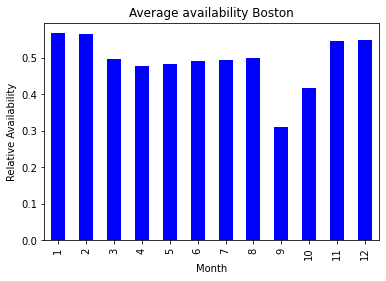

In [18]:
# now we visualize the average availability per month for boston
boston_grouped_df = calendar_boston.drop(columns=['listing_id']).groupby(
    calendar_boston['date'].dt.month).mean()

boston_grouped_df.plot(
    kind='bar', legend=False, title='Average availability Boston', xlabel='Month', ylabel='Relative Availability', color='blue');

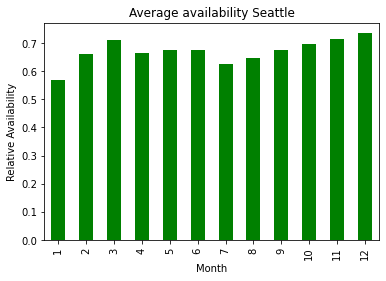

In [19]:
seattle_grouped_df = calendar_seattle.drop(columns=['listing_id']).groupby(
    calendar_seattle['date'].dt.month).mean()

seattle_grouped_df.plot(
    kind='bar', legend=False, title='Average availability Seattle', xlabel='Month', ylabel='Relative Availability', color='green');

<Figure size 432x288 with 0 Axes>

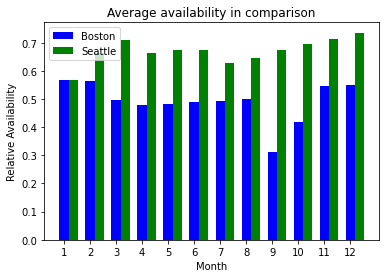

In [20]:
# Lets compare both in one chart
bar_width = 0.35

plt.figure();
fig, ax = plt.subplots()

ax.bar(boston_grouped_df.index, boston_grouped_df.values.ravel(), bar_width, color='blue')
ax.bar(seattle_grouped_df.index + bar_width, seattle_grouped_df.values.ravel(), bar_width, color='green')

ax.set_xlabel('Month')
ax.set_ylabel('Relative Availability')
ax.set_title('Average availability in comparison')
ax.set_xticks(seattle_grouped_df.index)
ax.legend(['Boston', 'Seattle'])


plt.show();

### Findings for Question 1
From our plots, we can see, that Boston has the highest number of booked rooms in September, while still beeing below average in October. In the winter months, most of the AirBnbs are available.

For Seattle the trend looks different, here we have no significant fall in the availability by juding by the information found in the plot. Except January has a lower availability which is not that significant as the September in Boston. In general it should be easier for you to find an AirBnb in Seattle than in Boston. 

## Question 2: Is the price higher in busy months?

Lets look at September and October in Boston and compare it to the average prices. Then lets compare January in Seattle with the average prices.

In [21]:
calendar_boston.price

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1308885    NaN
1308886    NaN
1308887    NaN
1308888    NaN
1308889    NaN
Name: price, Length: 1308890, dtype: object

In [22]:
# convert the price to float
try:
    calendar_boston.price = pd.to_numeric(calendar_boston.price)
except:
    print('the dollar sign is not parseable so lets custom parse it')

the dollar sign is not parseable so lets custom parse it


In [23]:
parsed_list = []

for entry in calendar_boston.price:
    if (type(entry) == str):
        parsed_list.append(float(entry[1:].replace(',', '')))
    else:
        parsed_list.append(entry)
        
calendar_boston.price = parsed_list

In [24]:
# custom parser for seattle
parsed_list = []

for entry in calendar_seattle.price:
    if (type(entry) == str):
        parsed_list.append(float(entry[1:].replace(',', '')))
    else:
        parsed_list.append(entry)
        
calendar_seattle.price = parsed_list

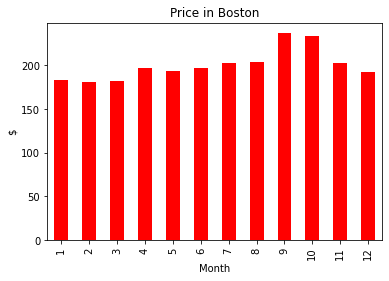

In [25]:
# now we visualize the average availability per month for boston
boston_grouped_price_df = calendar_boston.drop(columns=['listing_id', 'available']).groupby(
    calendar_boston['date'].dt.month).mean()

boston_grouped_price_df.plot(
    kind='bar', legend=False, title='Price in Boston', xlabel='Month', ylabel='$', color='red');

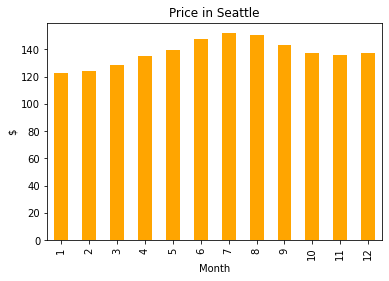

In [26]:
# now we visualize the average availability per month for boston
seattle_grouped_price_df = calendar_seattle.drop(columns=['listing_id', 'available']).groupby(
    calendar_seattle['date'].dt.month).mean()

seattle_grouped_price_df.plot(
    kind='bar', legend=False, title='Price in Seattle', xlabel='Month', ylabel='$', color='orange');

<Figure size 432x288 with 0 Axes>

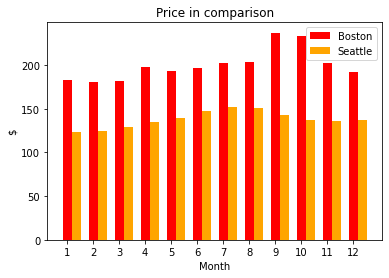

In [27]:
# Lets compare both in one chart
bar_width = 0.35

plt.figure();
fig, ax = plt.subplots()

ax.bar(boston_grouped_price_df.index, boston_grouped_price_df.values.ravel(), bar_width, color='red')
ax.bar(seattle_grouped_price_df.index + bar_width, seattle_grouped_price_df.values.ravel(), bar_width, color='orange')

ax.set_xlabel('Month')
ax.set_ylabel('$')
ax.set_title('Price in comparison')
ax.set_xticks(seattle_grouped_df.index)
ax.legend(['Boston', 'Seattle'])

plt.show();

In [28]:
# We now look at a correlation coefficient for each city between the grouped price and months
seattle_grouped_whole_df = calendar_seattle.drop(columns=['listing_id']).groupby(
    calendar_seattle['date'].dt.month).mean()
seattle_grouped_whole_df.corr()

,available,price
available,1.000000,0.062419
price,0.062419,1.000000


In [33]:
seattle_grouped_whole_df.corr().style.background_gradient(cmap='coolwarm')

,available,price
available,1.000000,0.062419
price,0.062419,1.000000


In [29]:
boston_grouped_whole_df = calendar_boston.drop(columns=['listing_id']).groupby(
    calendar_boston['date'].dt.month).mean()
boston_grouped_whole_df.corr()

,available,price
available,1.000000,-0.849624
price,-0.849624,1.000000


In [32]:
# make plot out of it
boston_grouped_whole_df.corr().style.background_gradient(cmap='coolwarm')

,available,price
available,1.000000,-0.849624
price,-0.849624,1.000000


We can see, that the average price in Boston is higher than in Seattle. 
We can also see, that in Boston prices are highest in October and September, where Availability is lowest. In Seattle the trend is not that clear, especially for the low availability in January there is no higher price. Also from the correlation matrix, we can see that Boston has a strong negative correlation with the availability and thus prices are higher in the highly booked months. This is not the case for Seattle.

## Question 3: Does a more expensive AirBnb lead to better reviews?